# Inference for categorical data

### In August of 2012, news outlets ranging from the Washington Post to the Huffington Post ran a story about the rise of atheism in America. The source for the story was a poll that asked people, "Irrespective of whether you attend a place of worship or not, would you say you are a religious person, not a religious person or a convinced atheist?" This type of question, which asks people to classify themselves in one way or another, is common in polling and generates categorical data. In this lab we take a look at the atheism survey and explore what’s at play when making inference about population proportions using categorical data.

## The data

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/openintro/atheism.csv'
url_content = requests.get(df_url, verify=False).content
atheism = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [2]:
atheism

nationality     response  year
0      Afghanistan  non-atheist  2012
1      Afghanistan  non-atheist  2012
2      Afghanistan  non-atheist  2012
3      Afghanistan  non-atheist  2012
4      Afghanistan  non-atheist  2012
...            ...          ...   ...
88027      Vietnam  non-atheist  2005
88028      Vietnam  non-atheist  2005
88029      Vietnam  non-atheist  2005
88030      Vietnam  non-atheist  2005
88031      Vietnam  non-atheist  2005

[88032 rows x 3 columns]

### We create a new dataframe

In [3]:
us12 = atheism[(atheism.nationality == 'United States') & (atheism.year == 2012)]

In [4]:
us12

nationality     response  year
49925  United States  non-atheist  2012
49926  United States  non-atheist  2012
49927  United States  non-atheist  2012
49928  United States  non-atheist  2012
49929  United States  non-atheist  2012
...              ...          ...   ...
50922  United States  non-atheist  2012
50923  United States  non-atheist  2012
50924  United States  non-atheist  2012
50925  United States  non-atheist  2012
50926  United States  non-atheist  2012

[1002 rows x 3 columns]

### Calculate the proportion of atheist in us12

In [5]:
ath_us12 = us12[us12.response == 'atheist']
print(len(ath_us12)/len(us12))

0.0499001996007984


## We will construct a 95% confidence interval for the proportion of atheists in the United States in 2012 but first we must be confident that conditions for inference are met.
## np>10 and n(1-p)>10

In [6]:
import numpy as np
from scipy.stats import norm

conf_lvl = 0.95
z_value = norm.ppf((1-(1-conf_lvl)/2))  # the Z value for the specified confidence level
prbs = us12.response.value_counts(normalize = True)  # the probabilities for the response of atheist and non-atheist
se = np.sqrt(prbs.prod()/len(us12))  # the standard error

# construct a 95% confidence interval for the proportion of atheists in the United States in 2012
ci1 = prbs['atheist'] - z_value * se
ci2 = prbs['atheist'] + z_value * se

# print the results
print(f'Number of successes (atheist) = {len(us12)*prbs[1]}')
print(f'Number of failures (non-atheist) = {len(us12)*prbs[0]}')
print(f'Standard error = {se}')
print(f'{int(conf_lvl*100)}% confidence interval = {ci1, ci2}')

Number of successes (atheist) = 50.0
Number of failures (non-atheist) = 952.0
Standard error = 0.006878629122390021
95% confidence interval = (0.0364183342579056, 0.0633820649436912)


In [7]:
print(2*z_value*se) #the margin of error for the estimate of the proportion

0.0269637306857856


## Exercise 1: Calculate confidence intervals for the proportion of atheists in 2012 in two other countries of your choice, and report the associated margins of error. (First you must test the conditions)

## How does the proportion affect the margin of error?

### First we will define an array p that is a sequence from 0 to 1 with each number separated by 0.01. We can then create a array of the margin of error (me) associated with each of these values of p using the familiar approximate formula ( ME = 2×SE). Lastly, we plot the two vectors against each other to reveal their relationship.

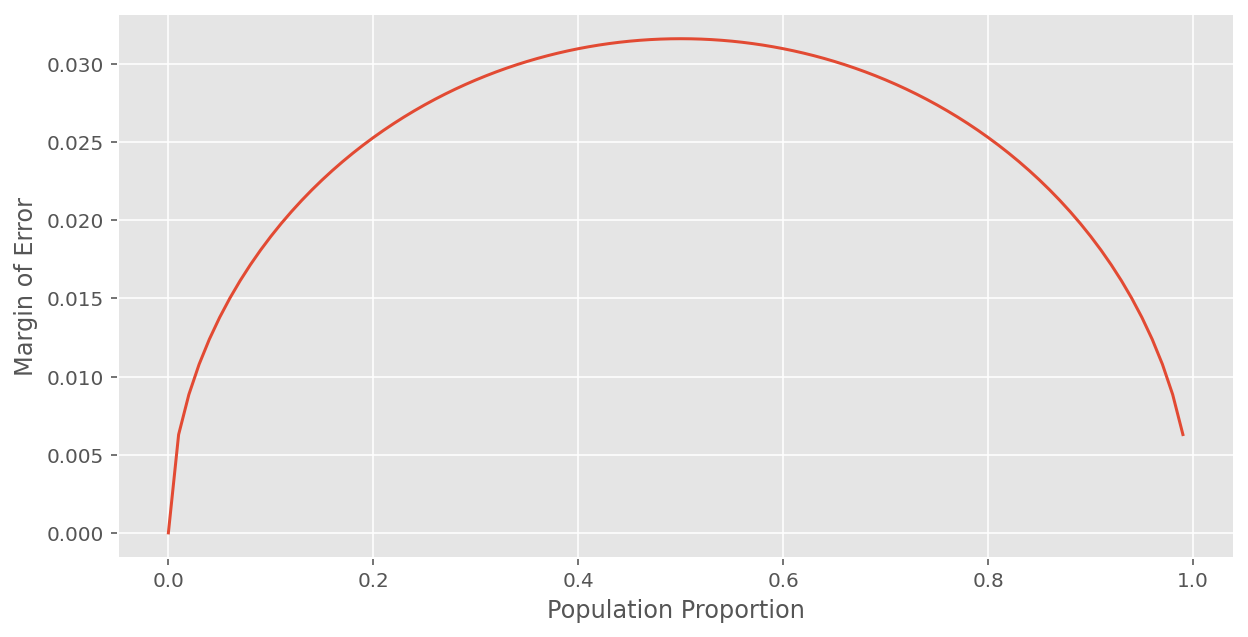

In [8]:
import numpy as np
n = 1000
p = np.arange(0, 1, 0.01)
me = 2 * np.sqrt(p * (1 - p)/n)

import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(p, me)
plt.xlabel('Population Proportion')
plt.ylabel('Margin of Error')
plt.show();

### We can investigate the interplay between n and p and the shape of the sampling distribution by using simulations. To start off, we simulate the process of drawing 5000 samples of size 1040 from a population with a true atheist proportion of 0.1. For each of the 5000 samples we compute and then plot a histogram to visualize their distribution.

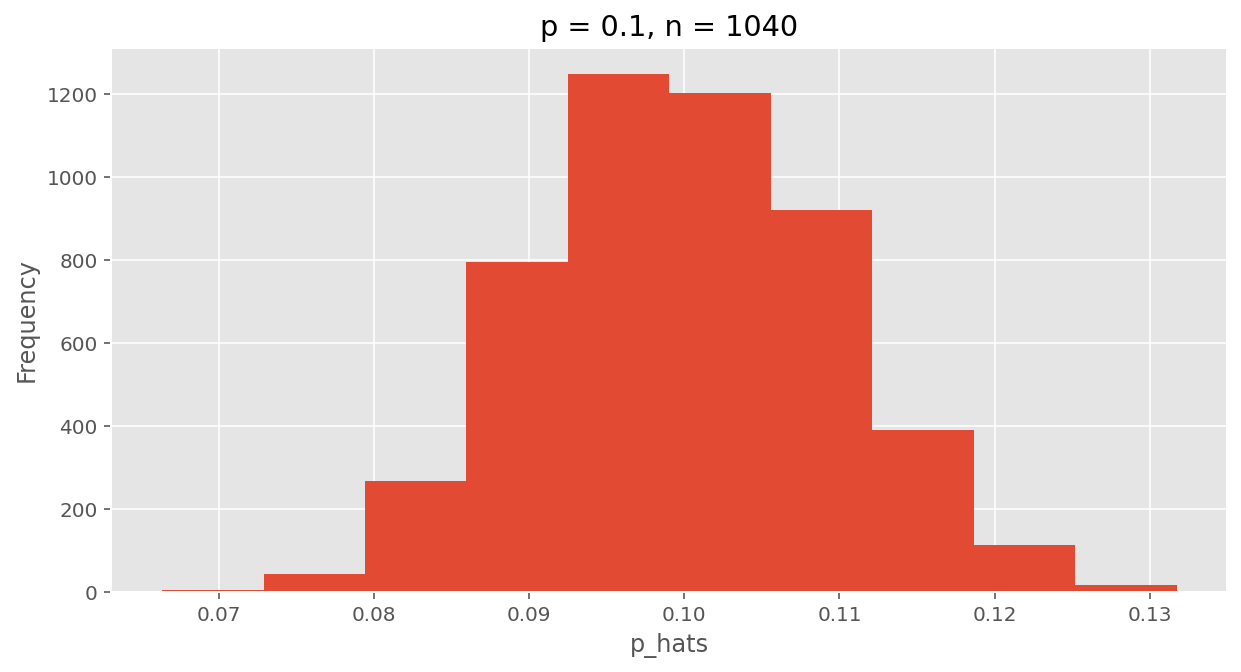

In [9]:
p = 0.1
n = 1040
p_hats = np.zeros(5000)

for i in range(5000):
    samp = np.random.choice(['atheist', 'non_atheist'], size = n, replace = True, p = [p, 1-p])
    p_hats[i] = sum(samp == 'atheist')/n

plt.hist(p_hats)
plt.xlabel('p_hats')
plt.ylabel('Frequency')
plt.title('p = 0.1, n = 1040')
plt.show();

## Exercise 2: Repeat the above simulation three more times but with modified sample sizes and proportions:
## n=400 and p=0.1
## n=1040 and p=0.2
## n=400 and p=0.2
## Plot the 3 histograms and describe the three new sampling distributions.